<a href="https://colab.research.google.com/github/khiljaekang/colab/blob/main/Copy_of_Chapter_02_%EC%84%A4%EB%AA%85%EA%B0%80%EB%8A%A5%ED%95%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 02. 설명가능한 머신러닝 (1)

## 실습 가이드
1. 데이터를 다운로드하여 Colab에 불러옵니다.
2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
3. 코드는 위에서부터 아래로 순서대로 실행합니다.
4. 전체 문제 구성은 좌측 첫 번째 아이콘을 통해 확인할 수 있습니다.

## Step 0. 설명 가능한 AI 소개 및 개요 

### 설명 가능한 AI

- 알고리즘이 도출한 결과에 대하여 설명 가능한 근거나 해석력을 보장하여 신뢰성과 투명성을 강화하려는 기술
- 미국 DARPA에서 제안한 XAI 프레임워크를 참고(2017)

![nn](https://www.darpa.mil/ddm_gallery/xai-figure2-inline-graphic.png)

참고: https://www.darpa.mil/program/explainable-artificial-intelligence



### 기대효과

- 신뢰도 확보
- 컴플라이언스 요구 충족 (규제 대응)
- 학습결과의 일반화
- 머신러닝 모델의 개선
- 판단 과정의 편향 발견
- 새로운 지식을 가설로 검증
- AutoML 사용시 데이터 분석가의 역할 확대


In [ ]:
#금융권 데이터 : 신용평가? 대출심사? 보험 가입심사, 보장급부 심사?, 투자성향 등급 산정? ( 펀드, 위험자산 <- 위험성향)



### XAI의 원리

- 0) 본질적으로 설명이 가능한 모델을 구축
- 1) 머신러닝 모델 전체에 대한 해석 제공
- 2) 머신러닝 모델에 쓰인 피처에 대한 해석 제공
- 3) 개별 데이터 포인트와 학습결과에 이르게 된 과정에 대한 해석 제공


### XAI 기법 소개
- 1) 피처 중요도(Feature Importance)


- 2) 부분 의존성(Partial Dependence Plot, PDP)


- 3) 대리 모델(Surrogate Analysis): LIME, SHAP 등


- 그 외 많은 방법론이 있으나 이번 주제에는 금융 모델에서 주로 쓰이는 위 3개를 중점적으로 다룹니다.

### <b>학습목표</b>
- 1) 설명가능한 AI의 이해


- 2) 피처 중요도에 대한 이해 


- 3) 부분 의존성에 대한 이해


- 4) LIME 알고리즘 구현


- 5) 해석을 바탕으로 모델을 개선하는 방법 습득

- 출제자: 최민정 강사

## Step 1. 머신러닝 모델에서 변수의 영향력 계산하기

In [ ]:
#chapter 02 패키지

-pickle (Step 1 ~): 머신러닝 모델 아웃풋과 데이터셋을 저장하기, 불러오기 
-gzip (Step 1 ~) : 파일압축하기, 압축풀기 
#XAI를 위한 기법
-eli5: 머신러닝 모델 설명(Explain like i am 5)
-pdpbox : partial dependance plot 학습 모델 설명, 시각화
-lime : 학습한 결과를 대리분석으로 설명


In [4]:
! pip install eli5
! pip install pdpbox
! pip install lime

     |████████████████████████████████| 34.0MB 115kB/s 
     |████████████████████████████████| 13.1MB 24.1MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758228 sha256=2b5ae7259a84caa83c3135e5b3869289d70edda25706e1224cd43beafd2103af
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [5]:
pip list

Package                       Version       
----------------------------- --------------
absl-py                       0.12.0        
alabaster                     0.7.12        
albumentations                0.1.12        
altair                        4.1.0         
appdirs                       1.4.4         
argon2-cffi                   20.1.0        
arviz                         0.11.2        
astor                         0.8.1         
astropy                       4.2.1         
astunparse                    1.6.3         
async-generator               1.10          
atari-py                      0.2.6         
atomicwrites                  1.4.0         
attrs                         21.2.0        
audioread                     2.1.9         
autograd                      1.3           
Babel                         2.9.1         
backcall                      0.2.0         
beautifulsoup4                4.6.3         
bleach                        3.3.0         
blis      

In [ ]:
#머신러닝 모델, 데이터 셋을 저장, 불러오기 이용방법
# 외부 모델 저장후 -> 불러오기 
# 나의 모델 저장 후 -> 불러오기 
# 세션 내에서 학습시킨 모델 이용하기

### 문제 01. 구축한 머신러닝 모델과 데이터 불러오기

In [6]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import gzip
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
# 미리 구축한 머신러닝 모델 다운로드 받기

datapath = 'https://github.com/mchoimis/financialML/raw/main/xai/'

모델 및 데이터 설명

- `data00` : 이진분류용 데이터

- `data01` : 다중분류용 데이터 

- `logreg` : Logistic Regression Classifier (`00`)

- `rfc`    : Random Forest Classifier (`00`, `01`)

- `gbc`    : Gradient Boosting Classifier (`00`)

- `lgbm`   : LightGBM Classifier (`00`, `01`)

In [8]:
# 모델 데이터를 업로드할 구글 드라이브와 코랩을 연동하기

from google.colab import drive
drive.mount('/content/gdrive')

## 실행 후 나오는 URL 주소에 가서 로그인을 해주세요.
## 로그인을 하셨다면 나오는 페이지에서 허용(Allow)을 눌러주세요.
## 생성된 authorization code 복사 후 코랩 창으로 돌아와 붙여넣으세요.
## Mounted at /content/gdrive (혹은 지정한 폴더 위치) 라는 메시지가 뜨면 마운트가 완료된 것입니다. 다음으로 넘어가주세요.

Mounted at /content/gdrive


In [9]:
! mkdir financialml #폴더 만들기 

In [10]:
! pwd #현재 디렉토리 

/content


In [ ]:
# 모델 데이터를 구글 드라이브에 업로드하기


In [11]:
# 업로드한 데이터와 모델 불러오기

modelpath = '/content/financialml/'
with gzip.open(modelpath + 'data00.pickle','rb') as f:
    data00 =  pickle.load(f)
with gzip.open(modelpath + 'data00_X_train.pickle','rb') as f:
    X_train = pickle.load(f)
with gzip.open(modelpath + 'data00_X_test.pickle','rb') as f:
    X_test =  pickle.load(f)    
with gzip.open(modelpath + 'data00_y_train.pickle','rb') as f:
    y_train = pickle.load(f)    
with gzip.open(modelpath + 'data00_y_test.pickle','rb') as f:
    y_test =  pickle.load(f) 

### 문제 02. 로지스틱 모델 회귀계수 해석하기

In [12]:
# Logistic Regression 이진분류 모델 불러오기
with open(modelpath + 'logreg00.pkl', 'rb') as file:
    logreg =  pickle.load(file)

In [13]:
# X_test 의 컬럼명 확인하기

X_test.columns


Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country'],
      dtype='object')

In [14]:
# Logistic Regression 이진분류 모델의 회귀계수 확인하기
logreg.coef_

array([[ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
        -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
         0.37244795,  0.01498249]])

In [15]:
# 데이터 형태 바꾸기

coef = sum(logreg.coef_)
coef

array([ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
       -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
        0.37244795,  0.01498249])

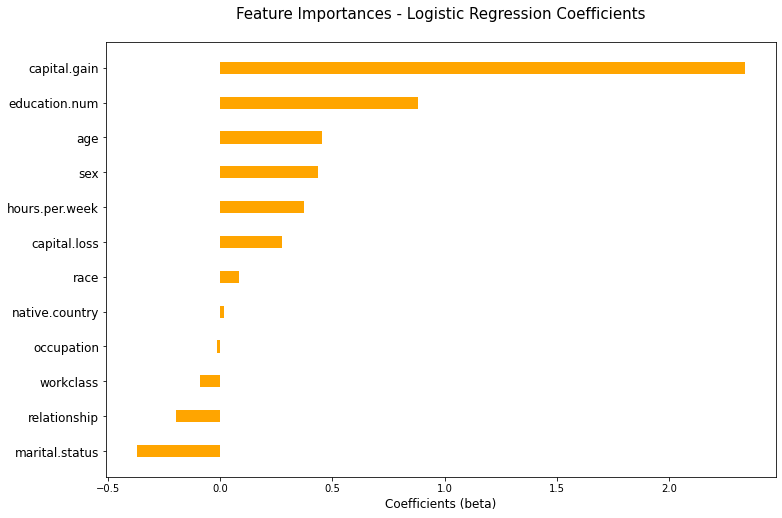

In [16]:
# Logistic Regression 이진분류 모델의 회귀계수 시각화 하기

indices =  np.argsort(coef)               # 회귀계수 크기 순으로 정렬

plt.figure(figsize=(12, 8))
plt.barh(X_test.columns, coef[indices], .35, color='orange', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)
plt.xlabel('Coefficients (beta)', fontsize=12)
plt.title('Feature Importances - Logistic Regression Coefficients\n', fontsize=15)
plt.show()

In [ ]:
nominal variable(순서 무)
ordinal varialbe(순서 유)

### 머신러닝 모델에서 변수의 영향력을 계산하는 방법

- 1) <b>회귀 모델의 회귀계수(Coefficients) </b>
    - X(피처)의 변량에 따라 y(타겟)의 변량이 어느 정도로 변하는지 수치화한 값
    - 변수 영향력의 방향(긍정, 부정)을 알 수 있다는 장점
    - 단점: 변수 스케일의 영향을 받기 때문에 스케일링 작업이 중요
    - scikit-learn의 `coef_` 메서드 사용


- 2) <b>트리 기반 모델의 MDI(Mean Decrease Impurity) 기반 중요도 </b>
    - 해당 피처가 모델에 적용될 때 전체적으로 분류 결과의 불순도(impurity)를 얼마나 감소시키는지를 측정
    - 불순도(impurity)의 측정 방법은 주로 entropy 혹은 Gini impurity로 계산
    - 피처가 모델이 분류를 잘 하는데 중요하게 작용할 수록 값이 커지게 됨
    - scikit-learn의 `feature_importances_` 메서드 사용


- 3) <b>치환(Permutation) 기반 중요도 </b>
    - 특정 피처의 값을 임의의 값으로 치환했을 떄 원래 데이터보다 예측 에러가 얼마나 더 커지는가를 측정 
    - 장점: 해석이 직관적이며, 계산에 시간이 오래 걸리지 않음
    - 단점: 변수간 상호의존성 때문에 특정 피처의 영향력을 과대 혹은 과소추정할 수 있음
    - scikit-learn의 `permutation_importance` 메서드 사용
    - eli5의 `PermutationImportance` 메서드 사용


- 4) <b>LGBM 모델의 분기 기반 중요도</b>
    - 기본값으로는 각 피처에서 결정을 내리기까지 분기(split)한 횟수를 나타냄
    - 파라미터 설정을 바꾸면 분기에서 얻어낸 정보 이득(gain)의 총합을 나타낼 수 있음
    - scikit-learn의 `feature_importances_` 메서드 사용
    - light gbm의 `plot_importance` 메서드 사용 


- 5) <b>XAI 커뮤니티에서 제안하는 게임이론 기반 Shapely 값</b>
    - 치환 피처 중요도(Permutation Importance)와 비슷하게 임의의 값으로 치환했을 때의 pay-off를 측정
    - 장점: 변수간 상호의존성에 영향을 받지 않으며, 계산시마다 값이 달라지지 않음, 변수 영향력의 방향(긍정, 부정)을 알 수 있음
    - 단점: 학습결과가 아니라 원 데이터에서 결정되기 때문에 아웃라이어에 약할 수 있음, 계산이 오래 걸림
    - shap의 `shap_values` 메서드 사용

각 방법론은 장단점이 뚜렷하고 계산방식이 다르므로 머신러닝 모델 해석시 상황에 맞게 적용하는 것이 중요합니다.

실제적인 응용은 문제를 풀면서 설명드리겠습니다.

In [ ]:
# X --> y == 10 (deterministic VS stochastic 확률적)
# X1, X2, X3 ... 

### 문제 03. Random Forest 이진분류 피처 중요도 분석하기

In [ ]:
# light gbm <- boosting <- sequential learning weak learners 
# 연속변수  --> 연속변수(이상적인 feature importance 유사할 수 있음)
# 연속변수 --> 범주변수, 범주변수 -->연속변수, 범주변수-->범주변수 (다양한 가능성) 

In [ ]:
# 학습에 사용할 데이터를 로드하고 압축 풀기
with gzip.open(modelpath + 'data00_X_train.pickle','rb') as f:
    X_train = pickle.load(f)
with gzip.open(modelpath + 'data00_X_test.pickle','rb') as f:
    X_test = pickle.load(f)    

In [17]:
# Random Forest Classifier를 이용하여 모델 fitting 하기 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc =   RandomForestClassifier(random_state= 42).fit(X_train, y_train)            

In [18]:
# 모델 저장하기

pickle.dump(rfc, open(modelpath + 'rfc00.pkl', 'wb'))

In [19]:
# 모델 불러오기
with open(modelpath + 'rfc00.pkl', 'rb') as file:
    rfc = pickle.load(file)

In [20]:
# Random Forest 이진분류 모델의 피처 중요도 확인하기

importances = rfc.feature_importances_  
importances

array([0.2120391 , 0.04862643, 0.14503283, 0.05946474, 0.08394042,
       0.12762821, 0.01853742, 0.01328217, 0.12340054, 0.0394054 ,
       0.10993623, 0.0187065 ])

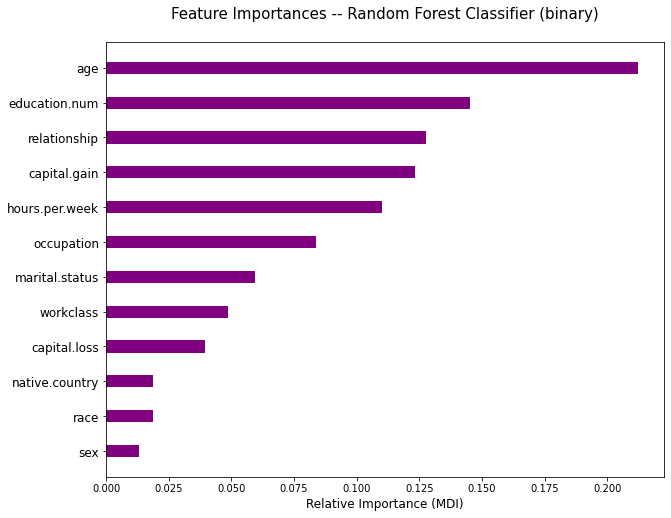

In [21]:
# Random Forest 이진분류 모델의 피처 중요도 시각화 하기

indices = np.argsort(importances)                  # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='purple', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Relative Importance (MDI)', fontsize=12)
plt.title('Feature Importances -- Random Forest Classifier (binary)\n', fontsize=15)
plt.show()

### 참고: Eli5를 이용하여 Permutation Importance 구하기

각 Feature별로 Shuffling을 하였을 때 Model의 Accuracy를 기준으로 반복하면서 발생한  데이터의 변동까지 표기 후 내림차순으로 정리한 결과값

### 문제 04. Random Forest 모델의 Permutation Importance 구하기

In [23]:
# Eli5를 이용하여 Random Forest 모델의 Permutation Importance 구하기
## (먼저 패키지를 설치해주세요)

import eli5

from eli5.sklearn import PermutationImportance

imp = PermutationImportance(rfc, random_state=1).fit(X_test, y_test)
imp

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [25]:
# 피처 중요도 순서대로 확인하기

eli5.show_weights(imp, feature_names = X_test.columns.tolist()) #MDI값과 다르다. 

Weight,Feature
0.0455 ± 0.0031,capital.gain
0.0279 ± 0.0072,relationship
0.0238 ± 0.0020,education.num
0.0121 ± 0.0062,age
0.0104 ± 0.0018,capital.loss
0.0103 ± 0.0051,occupation
0.0046 ± 0.0017,workclass
0.0044 ± 0.0047,hours.per.week
0.0016 ± 0.0022,marital.status
0.0007 ± 0.0018,sex


In [26]:
# 피처 중요도를 리스트로 뽑아내기

print(eli5.format_as_text(eli5.explain_weights(imp, feature_names= X_test.columns.tolist() )) )

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0455 ± 0.0031  capital.gain
0.0279 ± 0.0072  relationship
0.0238 ± 0.0020  education.num
0.0121 ± 0.0062  age
0.0104 ± 0.0018  capital.loss
0.0103 ± 0.0051  occupation
0.0046 ± 0.0017  workclass
0.0044 ± 0.0047  hours.per.week
0.0016 ± 0.0022  marital.status
0.0007 ± 0.0018  sex
0.0002 ± 0.0011  race
-0.0002 ± 0.0015  native.country


### 문제 05. Gradient Boosting 이진분류 피처 중요도 분석하기

In [ ]:
# Gradient Boosting 이진분류 모델 불러오기

with open(modelpath + 'gbc00.pkl', 'rb') as file:
    gbc =  

In [ ]:
# Gradient Boosting 이진분류 모델의 피처 중요도 확인하기

importances =  
importances  ###

In [ ]:
# Gradient Boosting 이진분류 모델의 피처 중요도 시각화 하기

indices =                         # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='lightgreen', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Relative Importance (MDI)', fontsize=12)
plt.title('Feature Importances -- Gradient Boosting Classifier (binary)\n', fontsize=15)
plt.show()

### 문제 06. LightGBM 이진분류 피처 중요도 분석하기

In [ ]:
# LightGBM 이진분류 모델 불러오기

with open(modelpath + 'lgbm00.pkl', 'rb') as file:
    lgbm =  

In [ ]:
# LightGBM 이진분류 모델의 피처 중요도 확인하기

importances =  
importances  ###

In [ ]:
# LightGBM 이진분류 모델의 피처 중요도 시각화 하기

indices =                     # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='lightblue', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Feature Importance (# of splits)', fontsize=12)
plt.title('Feature Importances -- LGBM Classifier (binary)\n', fontsize=15)
plt.show()

### 문제 07. 요약: 소득 예측 이진분류 모델 피처 중요도 비교

In [ ]:
# subplot을 이용하여 4개 이진분류 모델(logreg, gbc, rfc, lgbm)의 회귀계수 및 피처 중요도 시각화 비교하기

plt.figure(figsize=(18, 15))

plt.subplot( ) 

indices_logreg =    ###
plt.title('Logistic Regression Coefficients')
plt.barh(X_test.columns, coef[indices_logreg], .25, color='orange')
plt.yticks(X_test.columns, X_test.columns[indices_logreg])
plt.xlabel('Coefficients (beta)')

plt.subplot( )
importances_rfc =   ###
indices_rfc =   ###
plt.title('Feature Importances -- Random Forest Classifier (binary)')
plt.barh(X_test.columns, importances_rfc[indices_rfc], .25, color='purple')
plt.yticks(X_test.columns, X_test.columns[indices_rfc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot( )
importances_gbc =   ###
indices_gbc =    ###
plt.title('Feature Importances -- Gradient Boosting Classifier (binary)')
plt.barh(X_test.columns, importances_gbc[indices_gbc], .25, color='lightgreen')
plt.yticks(X_test.columns, X_test.columns[indices_gbc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot( )
importances_lgbm =   ###
indices_lgbm =   ###
plt.title('Feature Importances -- LGBM Classifier (binary)')
plt.barh(X_test.columns, importances_lgbm[indices_lgbm], .25, color='lightblue')
plt.yticks(X_test.columns, X_test.columns[indices_lgbm])
plt.xlabel('Feature Importance (# of splits)')

plt.show()

### 참고: 기법별로 설명이 상충될 때 모델 해석방법

피처 중요도의 순서가 꼭 의사결정 트리의 순서를 결정하는 것은 아닙니다.

트리는 노드의 선정과 분기 기준이 정보 이득(information gain)이 큰 방향이고, 피처 중요도는 모델의 분류 에러가 큰 순서로 정렬되기 때문입니다.

각 모델별, 피처별로 결과에 왜 차이가 났는지 생각해봅시다. 그리고 다중분류 모델과 비교해봅시다.

### 문제 08. 다중분류 Random Forest 피처 중요도 분석하기

In [ ]:
# 원본 데이터 불러오기

with gzip.open(modelpath + 'data01.pickle','rb') as f:
    data01 =  
with gzip.open(modelpath + 'data01_X.pickle','rb') as f:
    x =  
with gzip.open(modelpath + 'data01_y.pickle','rb') as f:
    y =  

In [ ]:
# 분석에 사용할 데이터 불러오기
with gzip.open(modelpath + 'data01_X_train.pickle','rb') as f:
    x_train =  
with gzip.open(modelpath + 'data01_X_test.pickle','rb') as f:
    x_test = 
with gzip.open(modelpath + 'data01_y_train.pickle','rb') as f:
    y_train01 =      ##
with gzip.open(modelpath + 'data01_y_test.pickle','rb') as f:
    y_test01 =     ##

In [ ]:
# 모델을 선언하고 fitting 하기

rfc1 =  

In [ ]:
# x_test의 컬럼명 확인하기


In [ ]:
# Random Forest 다중분류 모델의 피처 중요도 확인하기
importances =  
importances

In [ ]:
# Random Forest 다중분류 모델의 피처 중요도 시각화 하기

indices =                      # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))
plt.barh(x_test.columns, importances[indices], .35, color='purple', align='center')
plt.yticks(x_test.columns, x_test.columns[indices], fontsize=12)
plt.xlabel('Relative Importance', fontsize=12)
plt.title('Feature Importances -- Random Forest Classifier (multiclass)\n', fontsize=15)
plt.show()

### 문제 09. 다중분류 LGBM 피처 중요도 분석하기

In [ ]:
# 미리 저장한 LGBM 다중분류 모델 불러오기

with open(modelpath + 'lgbm01.pkl', 'rb') as file:
    lgbm1 =  

In [ ]:
# LGBM 다중분류 모델의 피처 중요도 확인하기

importances =  
importances

In [ ]:
# LGBM 다중분류 모델의 피처 중요도 시각화 하기

indices =                    # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))
plt.barh(x_test.columns, importances[indices], .35, color='lightblue', align='center')
plt.yticks(x_test.columns, x_test.columns[indices], fontsize=12)

plt.xlabel('Feature Importance', fontsize=12)
plt.title('Feature Importances -- LGBM Classifier (multiclass)\n', fontsize=15)
plt.show()

### 문제 10. 요약: 다중분류 피처 중요도 비교

In [ ]:
# subplot을 이용하여 2개 이진분류 모델(rfc1, lgbm1)의 피처 중요도 시각화 비교하기

plt.figure(figsize=(18, 10))

plt.subplot(      )    ###
importances_rfc =   ###
indices_rfc =   ###

plt.title('Feature Importances -- Random Forest Classifier (multiclass)')
plt.barh(x_test.columns, importances_rfc[indices_rfc], .25, color='purple')
plt.yticks(x_test.columns, x_test.columns[indices_rfc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(      )     ###
importances_lgbm =   ###
indices_lgbm =   ###

plt.title('Feature Importances -- LGBM Classifier (multiclass)')
plt.barh(x_test.columns, importances_lgbm[indices_lgbm], .25, color='lightblue')
plt.yticks(x_test.columns, x_test.columns[indices_lgbm])
plt.xlabel('Feature Importance (# of splits)')

plt.show()

### 참고: 모델 해석방법

일반적으로 피처 중요도와 의사결정 트리 분기 순서는 대부분 일치합니다. 

그러나 피처 중요도는 트리 깊이에 따라서도 바뀝니다. 즉 학습 파라미터에 따라 모델의 의사결벙 방식과 정확도가 함께 변하기 때문에 피처 중요도 그래프의 순서가 소득구간을 예측하는 우선순위라고 판단할 수는 없습니다. 

그렇지만 피처 중요도의 순서가 소득구간 예측에 영향을 미치는 정도를 구분한다는 해석은 가능하다고 볼 수 있습니다. 

## Step 2. 머신러닝 모델의 부분의존성 분석하기

### 부분 의존성 분석 소개

- 부분 의존성 플롯(Partial Dependence Plot): 피처의 수치를 선형적으로 변형하면서 알고리즘 해석 능력이 얼마나 증가하고 감소하는지 관찰하는 XAI 기법

- 피처 중요도 분석만으로는 해당 피처가 모델의 판단에 긍정적인 영향을 미치는지 혹은 부정적인 영향을 미치는지 알 수 없음

- 또한 현실 세계에 있는 피처 중 다수는 피처간 독립이 아니기 때문에 해석에 혼란을 야기할 수 있음

- 부분 의존성 플롯은 피처의 모델 영향력 뿐 아니라 특정 피처에 대해 여유분(buffer)을 함께 표시함으로써 피처간 상호의존성이 높더라도 어느 정도 모델에 오차가 있을 수 있는지 확인할 수 있게 함

- pdpbox 패키지는 부분 의존성 플롯(`pdp_isolate`) 뿐 아니라 목표 플롯(`target_plot`), 모델의 실제 예측에 대한 의존성 플롯(`actual_plot`) 등이 가능함

- 멀티 클래스 분류기에도 작동하며, 두 개의 피처가 상호 작용하는 부분 의존성 플롯(`pdp_interaction`)도 함께 시각화 한다는 장점이 있음

    - 목표 플롯: 피처의 구간별 분포에 대한 결과 간 상관관계 분석 결과를 보여줌
    - 부분 의존성 플롯: 학습한 모델에 대해 구간별로 해석 결과를 시각화

### 문제 11. 이진분류 인풋 데이터 준비하기

In [27]:
data00_prep = data00.drop(['education', 'fnlwgt'], axis=1)

In [28]:
from sklearn import preprocessing

categorical = ['income', 'workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        data00_prep[feature] = le.fit_transform(data00_prep[feature])

In [29]:
data00_prep.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0


In [30]:
data = data00_prep
features = data00_prep.columns[:12]
target =  data00_prep.columns[12]

### 문제 12. 변수별 이진분류 데이터 target plot 확인하기

In [31]:
from pdpbox import pdp, info_plots

In [32]:
# education 변수 구분 확인
data00['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [35]:
data00['education.num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1])

In [38]:
a = pd.DataFrame(data00['education'].unique())
a.rename(columns={0: 'education'}, inplace=True)

b = pd.DataFrame(data00['education.num'].unique())
b.rename(columns={0:'education.num'}, inplace=True)

c = pd.concat([a, b], axis=1)
c.sort_values('education.num')

,education,education.num
15,Preschool,1
11,1st-4th,2
12,5th-6th,3
2,7th-8th,4
14,9th,5
3,10th,6
8,11th,7
13,12th,8
0,HS-grad,9
1,Some-college,10


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


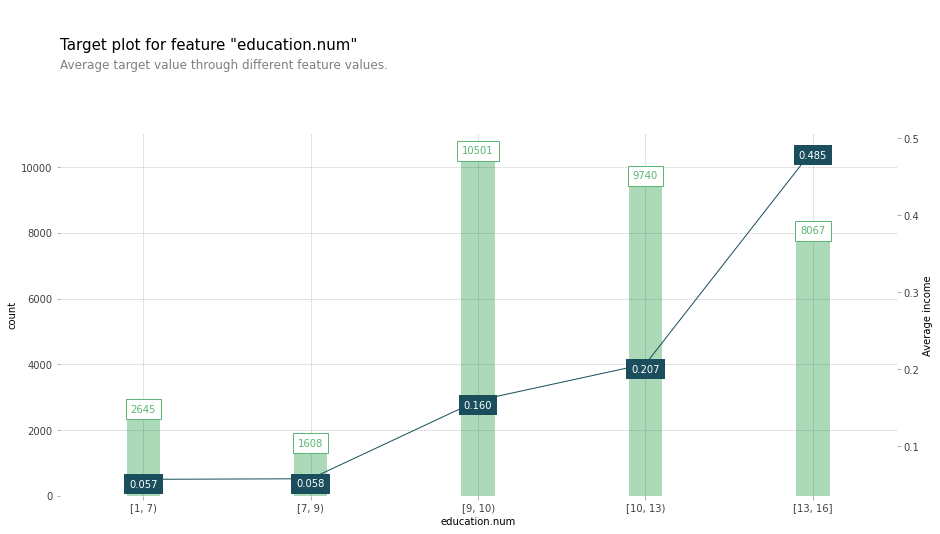

In [40]:
# 알고 싶은 변수가 `education.num`일 때 target plot 시각화 하기

fig, axes, summary_df = info_plots.target_plot(
    df =  data, 
    feature= 'education.num', 
    feature_name= 'education.num',     
    target=target 
    )

In [42]:
# `education.num` 변수 target_plot의 summary 확인하기
summary_df


,x,display_column,value_lower,value_upper,count,income
0,0,"[1, 7)",1.0,7.0,2645,0.057089
1,1,"[7, 9)",7.0,9.0,1608,0.057836
2,2,"[9, 10)",9.0,10.0,10501,0.159509
3,3,"[10, 13)",10.0,13.0,9740,0.206674
4,4,"[13, 16]",13.0,16.0,8067,0.484567


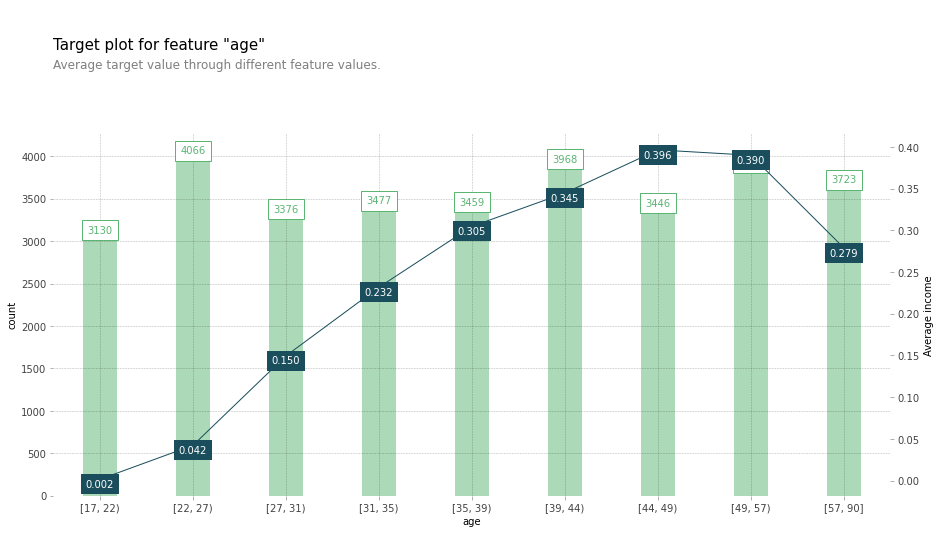

In [44]:
# 알고 싶은 변수가 `age`일 때 target plot 시각화 하기

fig, axes, summary_df = info_plots.target_plot(
    df =  data,
    feature = 'age', 
    feature_name = 'age',     
    target = target
    )

In [46]:
# `age` 변수 target_plot의 summary 확인하기
summary_df


,x,display_column,value_lower,value_upper,count,income
0,0,"[17, 22)",17.0,22.0,3130,0.001597
1,1,"[22, 27)",22.0,27.0,4066,0.042302
2,2,"[27, 31)",27.0,31.0,3376,0.149585
3,3,"[31, 35)",31.0,35.0,3477,0.231809
4,4,"[35, 39)",35.0,39.0,3459,0.304712
5,5,"[39, 44)",39.0,44.0,3968,0.344758
6,6,"[44, 49)",44.0,49.0,3446,0.396402
7,7,"[49, 57)",49.0,57.0,3916,0.389939
8,8,"[57, 90]",57.0,90.0,3723,0.278807


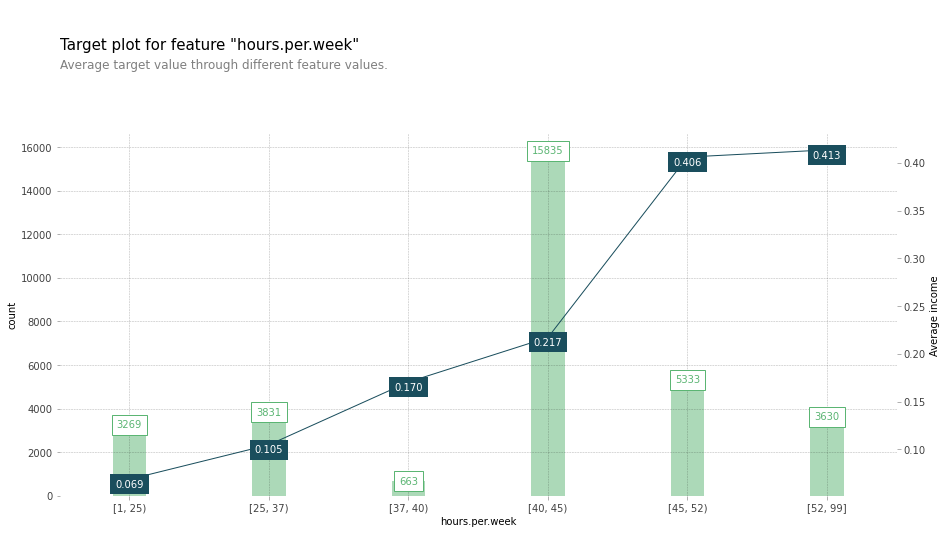

In [48]:
# 알고 싶은 변수가 `hours.per.week`일 때 target plot 시각화 하기

fig, axes, summary_df = info_plots.target_plot(
    df =  data, 
    feature = 'hours.per.week', 
    feature_name = 'hours.per.week',     
    target = target
    )

In [49]:
# `hours.per.week` 변수 target_plot의 summary 확인하기  
summary_df


,x,display_column,value_lower,value_upper,count,income
0,0,"[1, 25)",1.0,25.0,3269,0.068522
1,1,"[25, 37)",25.0,37.0,3831,0.104672
2,2,"[37, 40)",37.0,40.0,663,0.170437
3,3,"[40, 45)",40.0,45.0,15835,0.217051
4,4,"[45, 52)",45.0,52.0,5333,0.405963
5,5,"[52, 99]",52.0,99.0,3630,0.413499


### 문제 13. 변수별 이진분류 예측 actual plot 확인하기

In [ ]:
# `age` 변수에 대하여 LGBM 이진분류 예측 결과 actual plot 시각화 하기

fig, axes, summary_df = info_plots.actual_plot(
    model =  , ####
    X =  ,
    feature =  , 
    feature_name =  , 
    predict_kwds = {}
)

In [ ]:
# `age` 변수의 LGBM 이진분류 예측 결과 summary 확인하기



In [ ]:
# `education.num` 변수에 대하여 LGBM 이진분류 예측 결과 actual plot 시각화 하기

fig, axes, summary_df = info_plots.actual_plot(
    model =  , ####
    X =  ,
    feature =  , 
    feature_name =  , 
    predict_kwds = {}
)

In [ ]:
# `education.num` 변수의 LGBM 이진분류 예측 결과 summary 확인하기



In [ ]:
# `hours.per.week` 변수에 대하여 LGBM 이진분류 예측 결과 actual plot 시각화 하기

fig, axes, summary_df = info_plots.actual_plot(
    model = , ####
    X =  ,
    feature =  , 
    feature_name =  , 
    predict_kwds = {}
)

In [ ]:
# `hours.per.week` 변수의 LGBM 이진분류 예측 결과 summary 확인하기



### 문제 14. 두 변수간 target plot 확인하기

In [ ]:
# `age` 변수와 `education.num` 변수간 target interaction plot 확인하기

fig, axes, summary_df = info_plots.target_plot_interact(
    df = ,
    features = ,
    feature_names = ,
    target =  
)

In [ ]:
# `age` 변수와 `education.num` 변수간 target interaction summary 확인하기



In [ ]:
# `education.num` 변수와 `hours.per.week` 변수간 target interaction plot 확인하기

fig, axes, summary_df = info_plots.target_plot_interact(
    df = ,
    features = ,
    feature_names =  ,
    target =  
)

In [ ]:
# `education.num` 변수와 `hours.per.week` 변수간 summary 확인하기



### 문제 15. 두 변수간 모델 interaction plot 확인하기

In [ ]:
# `education.num` 변수와 `hours.per.week` 변수가 LGBM 이진분류 예측에서 보이는 interaction 시각화 하기

pdp_interaction = pdp.pdp_interact(model =        #### 
                                  dataset =  ,
                                  model_features =  ,
                                  features =       #### 

fix, axes = pdp.pdp_interact_plot(pdp_interact_out =  ,
                                 feature_names =  , #### 
                                 plot_type =  , #### 
                                 plot_pdp =  )

In [ ]:
# `age` 변수와 `education.num` 변수가 LGBM 이진분류 예측에서 보이는 interaction 시각화 하기
pdp_interaction = pdp.pdp_interact(model =          #### 
                                  dataset =  ,
                                  model_features =  ,
                                  features =  )        #### 

fix, axes = pdp.pdp_interact_plot(pdp_interact_out =  ,
                                 feature_names =  ,    #### 
                                 plot_type =  ,       #### 
                                 x_quantile =  ,      #### 
                                 plot_pdp =  )

### 문제 16. 변수별 이진분류 모델의 pdp plot 확인하기

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

In [ ]:
# Random Forest 이진분류 예측에서 `capital.gain`의 영향력 확인하기 

feat_name =    ###

capital_gain_pdp = pdp.pdp_isolate(model= ,  ###
                                   dataset= , 
                                   model_features= , 
                                   feature= )

fig, axes = pdp.pdp_plot(capital_gain_pdp, ##
                         feat_name, 
                         plot_pts_dist = True, 
                         frac_to_plot = 0.5)

In [ ]:
# Random Forest 이진분류 예측에서 `age`의 영향력 확인하기 

feat_name =    ###

age_pdp = pdp.pdp_isolate(model = ,     ###
                          dataset =  , 
                          model_features = , 
                          feature = )

fig, axes = pdp.pdp_plot(age_pdp, ##
                         feat_name, 
#                          plot_lines=True, ##
                         frac_to_plot = 0.5)

In [ ]:
# Random Forest 이진분류 예측에서 `education.num`의 영향력 확인하기 

feat_name =    ###

education_num_pdp = pdp.pdp_isolate(model = , ###
                                   dataset = , 
                                   model_features =  , 
                                   feature =  )

fig, axes = pdp.pdp_plot(education_num_pdp, ###
                         feat_name, 
#                          plot_lines=True, ###
#                          plot_pts_dist = True, #### 
                         frac_to_plot = 0.5)

### 문제 17. 다중분류 인풋 데이터 준비하기

In [ ]:
data01.head()

In [ ]:
data01_prep =  

In [ ]:
def value_change(x):
    if x <= 20000: return 0
    if x >  20000 and x <= 50000 : return 1
    if x >  50000 and x <= 70000 : return 2
    if x >  70000 and x <= 90000 : return 3 
    return 4

data01_prep['income.num'] =  

In [ ]:
from sklearn import preprocessing

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        data01_prep[feature] = le.fit_transform(data01_prep[feature])

In [ ]:
data01_prep.head()

In [ ]:
data = 
features =  
target =  

### 문제 18. 변수별 데이터 target plot 확인하기

In [ ]:
# `balance` 변수의 target plot 확인하기

fig, axes, summary_df = info_plots.target_plot(
    df =  , 
    feature = , 
    feature_name = ,     
    target = )

In [ ]:
# `balance` 변수 target plot의 summary 확인하기


In [ ]:
# `spend.groc` 변수의 target plot 확인하기

fig, axes, summary_df = info_plots.target_plot(
    df =  , 
    feature = , 
    feature_name = ,     
    target = )

In [ ]:
# `spend.groc` 변수 target plot의 summary 확인하기


In [ ]:
# `spend.med` 변수의 target plot 확인하기

fig, axes, summary_df = info_plots.target_plot(
    df =  , 
    feature = , 
    feature_name = ,     
    target = )

In [ ]:
# `spend.med` 변수 target plot의 summary 확인하기



In [ ]:
# `spend.trav` 변수의 target plot 확인하기

fig, axes, summary_df = info_plots.target_plot(
    df =  , 
    feature = , 
    feature_name = ,     
    target =  )

In [ ]:
# `spend.med` 변수 target plot의 summary 확인하기



In [ ]:
# `age` 변수의 target plot 확인하기

fig, axes, summary_df = info_plots.target_plot(
    df =  , 
    feature =  , 
    feature_name =  ,     
    target =  )

In [ ]:
# `age` 변수 target plot의 summary 확인하기



### 문제 19. 변수별 다중분류 예측 actual plot 확인하기

In [ ]:
# `asset` 변수의 Random Forest 다중분류 예측 actual plot 시각화 하기

fig, axes, summary_df = info_plots.actual_plot(
    model =  ,
    X =  ,
    feature =  , 
    feature_name =  , 
    predict_kwds = {}
)

In [ ]:
# `asset` 변수의 Random Forest 다중분류 예측 summary 확인하기 


In [ ]:
# `balance` 변수의 Random Forest 다중분류 예측 actual plot 시각화 하기


fig, axes, summary_df = info_plots.actual_plot(
    model =  ,
    X =  ,
    feature =  , 
    feature_name =  , 
    predict_kwds = {}
)

In [ ]:
# `balance` 변수의 Random Forest 다중분류 예측 summary 확인하기 


In [ ]:
# `spend.trav` 변수의 Random Forest 다중분류 예측 actual plot 시각화 하기

fig, axes, summary_df = info_plots.actual_plot(
    model =  ,
    X =  ,
    feature =  , 
    feature_name =  , 
    predict_kwds = {}
)

In [ ]:
# `spend.trav` 변수의 Random Forest 다중분류 예측 summary 확인하기


### 문제 20. 두 변수간 모델 target plot 확인하기

In [ ]:
# `age` 변수와 `balance` 변수의 target interaction plot 확인하기

fig, axes, summary_df = info_plots.target_plot_interact(
    df =  ,
    features =  ,
    feature_names = ,
    target =  
)

In [ ]:
# `age` 변수와 `balance` 변수간 target interaction plot의 summary 확인하기



In [ ]:
# `age` 변수와 `asset` 변수의 target interaction plot 확인하기

fig, axes, summary_df = info_plots.target_plot_interact(
    df =  ,
    features =  ,
    feature_names =  ,
    target =  
)

In [ ]:
# `age` 변수와 `asset` 변수간 target interaction plot의 summary 확인하기



In [ ]:
# `age` 변수와 `spend.trav` 변수의 target interaction plot 확인하기

fig, axes, summary_df = info_plots.target_plot_interact(
    df =  ,
    features =  ,
    feature_names =  ,
    target =  
)

In [ ]:
# `age` 변수와 `spend.trav` 변수간 target interaction plot의 summary 확인하기



### 문제 21. 두 변수간 interaction plot 확인하기

In [ ]:
# `balance` 변수와 `spend.trav` 변수의 pdp interaction plot 확인하기

pdp_interaction = pdp.pdp_interact(model =  , #### 
                                  dataset = , 
                                  model_features =  ,
                                  features =    #### 
                                   ) 
 
fix, axes = pdp.pdp_interact_plot(pdp_interact_out = pdp_interaction,  
                                 feature_names =  , #### 
                                 plot_type = 'grid', #### 
                                 x_quantile = True,
                                 plot_pdp = True)

### 문제 22. 변수별 다중분류 모델의 pdp plot 확인하기

In [ ]:
# `age` 변수의 LGBM 다중분류 모델 pdp plot 확인하기

feat_name = 

pdp1 = pdp.pdp_isolate(model =  , ### 
                       dataset = ,
                       model_features =  ,
                       feature = feat_name)

fig, axes = pdp.pdp_plot(pdp1, feat_name, frac_to_plot = 0.5)

In [ ]:
# `spend.groc` 변수의 LGBM 다중분류 모델 pdp plot 확인하기

feat_name = 

pdp1 = pdp.pdp_isolate(model =  , ###
                       dataset =  , 
                       model_features =  , 
                       feature = feat_name)

fig, axes = pdp.pdp_plot(pdp1, feat_name, frac_to_plot = 0.5)

In [ ]:
 # `spend.med` 변수의 LGBM 다중분류 모델 pdp plot 확인하기

feat_name =  

pdp1 = pdp.pdp_isolate(model =  , ###
                       dataset =  , 
                       model_features =  , 
                       feature = feat_name)

fig, axes = pdp.pdp_plot(pdp1, feat_name, frac_to_plot = 0.5)

In [ ]:
# `spend.trav` 변수의 LGBM 다중분류 모델 pdp plot 확인하기

feat_name = 

pdp1 = pdp.pdp_isolate(model =  , ###
                       dataset =  , 
                       model_features =  , 
                       feature = feat_name)

fig, axes = pdp.pdp_plot(pdp1, feat_name, frac_to_plot = 0.5)

In [ ]:
# `balance` 변수의 LGBM 다중분류 모델 pdp plot 확인하기

feat_name = 

pdp1 = pdp.pdp_isolate(model =  , ###
                       dataset =  , 
                       model_features =  , 
                       feature = feat_name)

fig, axes = pdp.pdp_plot(pdp1, feat_name, frac_to_plot = 0.5)

In [ ]:
# `asset` 변수의 LGBM 다중분류 모델 pdp plot 확인하기

feat_name = 
pdp_asset = pdp.pdp_isolate(model = , dataset = , model_features = , feature =  )

pdp.pdp_plot(pdp_asset, feat_name)
plt.show()

## Step 3. 머신러닝 모델의 대리분석 모형 구현하기

### 대리분석 소개
- 대리분석(surrogate analysis): 본래 기능을 흉내 내는 간단한 대체재를 만들어 프로토타입이 동작하는지 판단하는 분석 방법
- XAI에서는 모델이 너무 복잡해서 분석이 불가능 할때 유사한 기능을 수행하는 모델을 여러개 만들어 본래의 모델을 분석하는 방법을 의미


- 원래 모델 f가 있고 흉내내는 모델 g가 존재 할 때, 다음 과 같은 조건에 부합해야 함
    - 1) g가 f보다 학습하기 쉽고
    - 2) g는 설명가능한 모델
    - 3) g는 f를 유사하게 흉내


- 글로벌 대리 분석(global surrogate analysis): 학습데이터의 전부(또는 일부)를 사용한 대리분석 모델
- 로컬 대리 분석(local surrogate analysis): 학습데이터 하나를 해석하는 과정


- 대리 분석의 가장 큰 장점은 모델 애그노스틱(model-agnostic) 하다는 것
- 또한 적은 데이터로 설명가능한 모델을 만들수 있음
- 중간에 모델 f가 바뀌어도 피처만 같으면 대리 분석 수행 가능(모델들이 분리돼 있기 때문)

### LIME(Local Interpretable Model-agnostic Explanations)
구축된 머신러닝 모델이 현재 데이터의 어떤 영역을 집중해서 분석했고 어떤 영역을 분류 근거로 사용했는지 알려주는 XAI기법

- 이미지, 텍스트 등의 매트릭스 형태 데이터(`LimeImageExplainer`, `LimeTextExplainer`)
- 금융 등의 정형 테이블 데이터(`LimeTabularExplainer`)

### 문제 23. LIME을 이용하여 개별 데이터 분석하기(이진분류)

In [ ]:
# 먼저 패키지를 설치해주세요
import lime.lime_tabular

In [ ]:
# 개별 데이터 포인트 확인하기

pd.DataFrame( ).T

In [ ]:
# 데이터 형태 변경하기

row =  
to_predict =  

In [ ]:
# Random Forest 이진분류 모델의 개별 데이터 클래스별 예측 확률 구하기



In [ ]:
# LIME으로 Random Forest 이진분류 모델의 개별 데이터 분류 근거 설명하기
model =   # 모델 설정

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, 
                                                   feature_names = ,
                                                   discretize_continuous = True)

exp = explainer.explain_instance( ) ###
exp.show_in_notebook(show_table=True)

In [ ]:
# Gradient Boosting 이진분류 모델의 개별 데이터 클래스별 예측 확률 구하기

 

In [ ]:
# LIME으로 Gradient Boosting 이진분류 모델의 개별 데이터 포인트 분류 근거 설명하기

model =   # 모델 설정

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, 
                                                   feature_names = ,
                                                   discretize_continuous = True)

exp = explainer.explain_instance( ) ###
exp.show_in_notebook(show_table=True)

In [ ]:
# LightGBM 이진분류 모델의 개별 데이터 클래스별 예측 확률 구하기



In [ ]:
# LIME으로 LightGBM 이진분류 모델의 개별 데이터 포인트 분류 배경 설명하기

model =   # 모델 설정

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, 
                                                   feature_names = ,
                                                   discretize_continuous = True)

exp = explainer.explain_instance(row, model.predict_proba, num_features = ) ###
exp.show_in_notebook(show_table=True)

In [ ]:
# Logistic Regression 이진분류 모델의 개별 데이터 클래스별 예측 확률 구하기

 

In [ ]:
# LIME으로 Logistic Regression 이진분류 모델의 개별 데이터 포인트 분류 근거 설명하기

model =   # 모델 설정

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, 
                                                   feature_names = ,
                                                   discretize_continuous = True)

exp = explainer.explain_instance(row, model.predict_proba, num_features = ) ###
exp.show_in_notebook(show_table=True)

In [ ]:
# 이 고객의 실제 소득구간(이진분류 클래스)은 무엇이었을까?

print("This person's actual income class (binary) is: ",  )

### 문제 24. LIME으로 개별 데이터 분석하기(다중분류)

In [ ]:
import lime.lime_tabular

In [ ]:
# 개별 데이터 포인트 확인하기

pd.DataFrame( ).T

In [ ]:
# 데이터 형태 변경하기

row =  
to_predict =  

In [ ]:
# Random Forest 다중분류 모델의 개별 데이터 클래스별 예측 확률 구하기

 

In [ ]:
# LIME으로 Random Forest 다중분류 모델의 개별 데이터 분류 근거 설명하기

model =      # 모델 설정

explainer = lime.lime_tabular.LimeTabularExplainer(x_test.values, feature_names=x_test.columns,
                                                    discretize_continuous=True)

exp = explainer.explain_instance(  ) ###
exp.show_in_notebook(show_table=True)

In [ ]:
# LightGBM 다중분류 모델의 개별 데이터 클래스별 예측 확률 구하기

 

In [ ]:
# LIME으로 Logistic Regression 이진분류 모델의 개별 데이터 포인트 분류 근거 설명하기

model =   # 모델 설정

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, 
                                                   feature_names = ,
                                                   discretize_continuous = True)

exp = explainer.explain_instance(row, model.predict_proba, num_features = ) ###
exp.show_in_notebook(show_table=True)

In [ ]:
# 이 고객의 실제 소득구간(다중분류 클래스)은 무엇이었을까?

print("This person's actual income class (among 5 classes) is: ", )

## Step 4. 요약
- 1) 설명가능한 AI의 이해<p>
: **모델**을 설명하는 방법, **각 피처**를 설명하는 방법, **개별 데이터 포인트**를 설명하는 방법


- 2) 피처 중요도에 대한 이해<p>
: 각 모델에서 **피처 중요도**를 계산하는 방식과 기준(Coefficients, MDI, Permutation, Splits, Shapely 값)


- 3) 부분 의존성에 대한 이해<p>
    : `pdpplot` 패키지를 이용하여 변수의 예측 기여도, 변수 구간별 비선형적 영향력, 변수간 의존관계 등


- 4) LIME 알고리즘 구현 (정형 데이터)<p>: 
     `LimeTabularExplainer`를 이용하여 모델의 분류 근거 해석하기

- 5) 해석을 바탕으로 모델을 개선하는 방법 습득<p>
    : 주요 변수의 선정 기준 근거 마련


- Chapter 03.에서는 LIME을 이용하여 비정형 데이터 학습모델을 설명하는 방법과 또 다른 대리분석 방법인 Shap에 대하여 알아보겠습니다.